In [1]:
# !pip install torch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
x = [[1, 1], [2, 1], [2, 2], [1, 2]]
y = [[1], [0], [1], [0]]

In [4]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [5]:
dataset = torch.utils.data.TensorDataset(x, y)

In [6]:
dataset[0]

(tensor([1., 1.]), tensor([1.]))

In [7]:
len(dataset)

4

In [8]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

In [9]:
# Example linear layer with 100 inputs and 50 outputs:
linear_layer = nn.Linear(100, 50)

In [10]:
model = nn.Sequential(
    nn.Linear(2, 4), # 2 inputs and 4 outputs for the first layer
    nn.ReLU(),
    nn.Linear(4, 1) # 4 inputs and one output for the second layer.
)

In [11]:
def evaluate(model, dataloader):
    preds, labels = [], []
    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            inputs, targets = batch
            prediction = model(inputs).sigmoid()
            preds.append(prediction.flatten())
            labels.append(targets.flatten())
    preds = torch.cat(preds, dim=0)
    labels = torch.cat(labels, dim=0)
    pred_thresholded = (preds > 0.5)
    return (pred_thresholded == labels).float().mean()

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
import tqdm

losses, accuracies = [], []
pbar = tqdm.tqdm(range(200))

for epoch in pbar:
    total_loss = 0
    for i, batch in enumerate(dataloader):
        inputs, labels = batch
        preds = model(inputs)
        loss = F.binary_cross_entropy_with_logits(preds.flatten(), labels.flatten())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss = total_loss + len(inputs) * loss.item()
    losses.append(total_loss)
    accuracy = evaluate(model, dataloader)
    accuracies.append(accuracy)

    pbar.set_description(f"Epoch {epoch}, Loss: {total_loss:.3f}, Accuracy: {accuracy:.3f}")

Epoch 199, Loss: 1.966, Accuracy: 0.750: 100%|██████████| 200/200 [00:01<00:00, 120.78it/s]


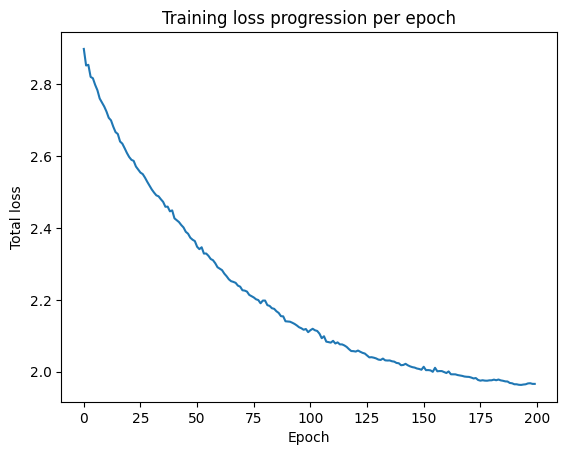

In [14]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Total loss")
plt.title("Training loss progression per epoch")
plt.show()

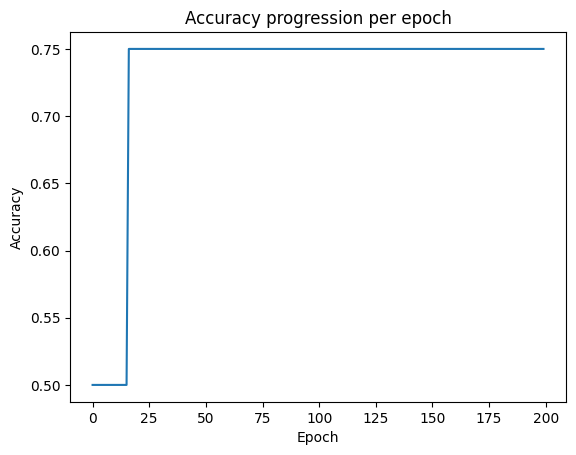

In [15]:
plt.plot(accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy progression per epoch")
plt.show()

In [16]:
torch.save(model.state_dict(), "my_model_path.pt")

In [17]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1)
)
model.load_state_dict(torch.load("my_model_path.pt"))

<All keys matched successfully>

In [18]:
class MyModel(nn.Module):
    def __init__(self, input_size, output_size, intermediate_size):
        super().__init__() # This calls the init function of nn.Module

        self.input_size = input_size
        self.output_size = output_size
        self.intermediate_size = intermediate_size

        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.intermediate_size),
            nn.ReLU(),
            nn.Linear(self.intermediate_size, self.output_size)
        )

    def forward(self, x):
        return self.model(x)

In [19]:
def my_loss(logits, labels):
    logits, labels = logits.flatten(), labels.flatten()
    return (-(labels * F.logsigmoid(logits) + (1-labels) * F.logsigmoid(-logits))).mean()

In [20]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx]) # this function is called when we index the dataset (e.g. dataset[3])

    def __len__(self):
        return len(self.x) # this function tells us the length (len(dataset)) in order to iterate through the dataset

dataset = CustomDataset(x, y)

In [21]:
# Logistic regression
X = torch.randn((100, 7))
Y = torch.randint(0, 2, (100,)).float()
model = nn.Linear(7, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# one sample training step
logits = model(X)
loss = F.binary_cross_entropy_with_logits(logits.flatten(), Y.flatten())

optimizer.zero_grad()
loss.backward()
optimizer.step()

In [22]:
# Linear regression
X = torch.randn((100, 7))
Y = torch.randn((100,))
model = nn.Linear(7, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# one sample training step
preds = model(X)
loss = F.mse_loss(preds.flatten(), Y.flatten())

optimizer.zero_grad()
loss.backward()
optimizer.step()